# <div align="center">**Курсовая работа**</div>

# <div align="center">**Тема: машинное обучение в задачах классификации текстов**</div>

### Репозиторий GitHub: [Coursework-2024](https://github.com/Al-Nator/Coursework-2024)

### Содержание работы:
1) Теоретическая постановка работы (пункт 1 из заданий для выполнения)

2) Предварительный анализ данных (пункты 1, 2, 4, 11 из заданий для выполнения)

3) Предобработка и анализ текста (пункты 11 из заданий для выполнения)

4) Отбор лучших моделей классического машинного обучения (пункты 3, 6, 7, 11 из заданий для выполнения)

5) Подбор гиперпараметров для лучших моделей (пункты 3, 8, 9, 10, 11 из заданий для выполнения)

6) Модель "Longformer" (пункт 3, 7 из заданий для выполнения)

7) Модель "RoBERTa" (пункт 3, 7 из заданий для выполнения)

8) Заключение (пункт 11 из заданий для выполнения)

### Проблема

С увеличением объемов цифровой информации, особенно текстовой, все более актуальной становится задача классификации текстов. Классификация текстов позволяет автоматически распределять текстовые данные по категориям, что является важным аспектом для многих отраслей, таких как маркетинг, здравоохранение и финансы. Проблема заключается в необходимости повышения точности и эффективности алгоритмов классификации текстов, особенно в условиях больших объемов данных и ограниченных вычислительных ресурсов.

### Актуальность

Классификация текстов на основе машинного обучения имеет важное значение в современном мире, где объем текстовых данных растет экспоненциально. Возможность эффективно обрабатывать и анализировать эти данные предоставляет компаниям и организациям конкурентное преимущество. Применение классификации текстов широко распространено в таких областях, как:

- Маркетинг: анализ отзывов и сегментация аудитории (Яндекс.Маркет, Wildberries).
- Здравоохранение: классификация медицинских записей (СберЗдоровье).
- Финансы: обнаружение мошенничества (Сбербанк, ВТБ).

### Гипотеза

Использование современных алгоритмов машинного обучения и глубокого обучения, таких как Longformer и RoBERTa, может существенно повысить точность классификации текстов по сравнению с традиционными методами, такими как Logistic Regression и Naive Bayes.

### Цель
 Повышение точности и эффективности алгоритмов классификации текстов с использованием методов машинного обучения.

### Задачи
1. Провести анализ существующих методов классификации текстов и выбрать наиболее перспективные алгоритмы.
2. Собрать и подготовить датасет для обучения и тестирования моделей.
3. Провести предварительную обработку данных, включая удаление дубликатов, токенизацию, лемматизацию и удаление стоп-слов.
4. Разработать и обучить несколько моделей машинного обучения, включая традиционные алгоритмы и современные модели глубокого обучения.
5. Оптимизировать гиперпараметры выбранных моделей для повышения их точности.
6. Провести сравнительный анализ результатов и сделать выводы о наиболее эффективных методах классификации текстов.

### Тип работы

Тип работы: практическая работа, направленная на сравнение и внедрение современных методов машинного обучения для классификации текстов.

Упор в работе сделан на:
- Сравнительный анализ различных моделей машинного обучения.
- Оптимизацию гиперпараметров для повышения точности классификации.
- Внедрение моделей глубокого обучения, таких как Longformer и RoBERTa, и их сравнение с классическими методами.


В работе было представлено 9 методов машинного обучения:

1. Complement Naive Bayes 
2. Multinomial Naive Bayes 
3. Logistic Regression
4. Stochastic Gradient Descent Classifier 
5. Ridge Classifier
6. Linear Support Vector Classifier 
7. Random Forest Classifier
8. Longformer
9. RoBERTa

In [115]:
# Стандартные библиотеки
import itertools as it
import pkg_resources
import sys
import time

# Обработка данных
import numpy as np
import pandas as pd

# Визуализация данных
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from wordcloud import WordCloud

# Машинное обучение: предобработка и модели
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Оптимизация моделей
import optuna
from optuna.visualization import plot_optimization_history

# Обработка текста и NLP
from collections import Counter, defaultdict
from gensim.models import Word2Vec
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from symspellpy import SymSpell
from tqdm import tqdm

# Пользовательские классы и функции
from sklearn.base import TransformerMixin

# Transformers и Datasets
from datasets import load_dataset
from transformers import (
    LongformerForSequenceClassification,
    LongformerTokenizerFast,
    RobertaForSequenceClassification,
    RobertaTokenizerFast,
    Trainer,
    TrainingArguments
)

import plotly.io as pio
pio.renderers.default = 'notebook'

# <div align="center">**Предварительный анализ данных**</div>

### Описание датасета:

Датасет: [IMDb movie ratings sentiment analysis](https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis/data), состоящий из отзывов к фильмам

- Размер: 40,000 отзывов
- Метки: Отзывы размечены как положительные или отрицательные
- Критерии отбора: Только отзывы с ярко выраженной полярностью; отрицательные — оценка ≤ 4 из 10, положительные — оценка ≥ 7 из 10
- Использование: Для тренировки и тестирования моделей машинного обучения в задачах анализа тональности

Связь с проблемой:
Датасет позволяет проверить эффективность различных алгоритмов машинного обучения в задаче сентимент-анализа текстов. Точные и эффективные модели классификации могут быть применены в реальных сценариях, таких как анализ отзывов клиентов в маркетинге или анализ медицинских записей в здравоохранении, что подчеркивает актуальность исследования.

Считаем датасет

In [116]:
data = pd.read_csv(r'C:\Users\malna\OneDrive\Документы\Coursework\movie.csv')
data.head()

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

Посмотрим два отзыва полностью

In [117]:
data.text.values[0:2]

array(['I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.',
       "When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I

Посмотрим размерность датасета

In [118]:
data.shape

(40000, 2)

Посчитаем дубликаты в датасете

In [119]:
data.duplicated().sum()

277

Удалим их, оставив лишь первые строки из повторяющихся

In [120]:
data = data.drop_duplicates() 
text = data.text
label = data.label
data.duplicated().sum()

0

Выведем размерность датасета без дубликатов

In [121]:
data.shape

(39723, 2)

Посмотрим основную информацию о датасете

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39723 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39723 non-null  object
 1   label   39723 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 931.0+ KB


Посмотрим на количество представителей каждого класса и изобразим на круговой диаграмме

In [123]:
label.value_counts()

label
1    19908
0    19815
Name: count, dtype: int64

In [124]:
fig = px.pie(values=label.value_counts(), names=['Положительные','Отрицательные'], title='Доли позитивных и негативных рецензий')
fig.update_layout(width = 500, height = 500, title_x=0.5)
fig.show()

Классы сбалансированы

Посмотрим на количество пропущенных значений

In [125]:
data.isna().sum()

text     0
label    0
dtype: int64

Пропусков нет

Добавим в датафрейм символьную длину рецензий и посмотрим на её выбросы

In [126]:
data['len'] = text.str.len()
data.head()

text  label   len
0  I grew up (b. 1965) watching and loving the Th...      0   874
1  When I put this movie in my DVD player, and sa...      0  1811
2  Why do people who do not know what a particula...      0   983
3  Even though I have great interest in Biblical ...      0   351
4  Im a die hard Dads Army fan and nothing will e...      1   983

In [127]:
fig = px.box(data_frame=data, x='label', y='len', color='label',
             category_orders={'label': [1, 0]})
fig.update_layout(title='Ящик с усами для длины рецензий', showlegend=False,
                      xaxis_title='Класс', yaxis_title='Длина рецензии', title_x=0.5)
fig.update_xaxes(tickvals=[0, 1], ticktext=['Отрицательные', 'Положительные'])
fig.show() 

c:\Users\malna\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Видим, что самые длинные рецензии - позитивные. Теперь изобразим распределение длины рецензий по классам

In [128]:
fig = px.histogram(data, x='len', color='label', category_orders={'label': [1, 0]})
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.update_layout(title='Распределение длины рецензий', legend_title='',
                      xaxis_title='Длина рецензии', yaxis_title='Количество рецензий', title_x=0.5)
newnames = {'0': 'Отрицательные', '1': 'Положительные'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

c:\Users\malna\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Распределения практически идентичны

# <div align="center">**Предобработка и анализ текста**</div>

Разобьём тексты на слова (токенизируем), это необходимо для дальнейшей предобработки

In [129]:
tokens = [word_tokenize(line) for line in tqdm(text.str.replace('<br /><br />', ' ').str.lower(), file=sys.stdout, colour='GREEN')]
data['tokens'] = tokens
data.head()

100%|██████████| 39723/39723 [00:48<00:00, 824.48it/s]


text  label   len  \
0  I grew up (b. 1965) watching and loving the Th...      0   874   
1  When I put this movie in my DVD player, and sa...      0  1811   
2  Why do people who do not know what a particula...      0   983   
3  Even though I have great interest in Biblical ...      0   351   
4  Im a die hard Dads Army fan and nothing will e...      1   983   

                                              tokens  
0  [i, grew, up, (, b, ., 1965, ), watching, and,...  
1  [when, i, put, this, movie, in, my, dvd, playe...  
2  [why, do, people, who, do, not, know, what, a,...  
3  [even, though, i, have, great, interest, in, b...  
4  [im, a, die, hard, dads, army, fan, and, nothi...

Исправим опечатки в текстах

In [130]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

True

In [131]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
corrected_tokens = [
    [corrected for token in line if (corrected:=sym_spell.lookup_compound(token, max_edit_distance=2)[0].term)]
    for line in tqdm(tokens, file=sys.stdout, colour='GREEN')]
data['corrected_tokens'] = corrected_tokens
data.head()

100%|██████████| 39723/39723 [02:33<00:00, 259.28it/s]


text  label   len  \
0  I grew up (b. 1965) watching and loving the Th...      0   874   
1  When I put this movie in my DVD player, and sa...      0  1811   
2  Why do people who do not know what a particula...      0   983   
3  Even though I have great interest in Biblical ...      0   351   
4  Im a die hard Dads Army fan and nothing will e...      1   983   

                                              tokens  \
0  [i, grew, up, (, b, ., 1965, ), watching, and,...   
1  [when, i, put, this, movie, in, my, dvd, playe...   
2  [why, do, people, who, do, not, know, what, a,...   
3  [even, though, i, have, great, interest, in, b...   
4  [im, a, die, hard, dads, army, fan, and, nothi...   

                                    corrected_tokens  
0  [i, grew, up, b, 1965, watching, and, loving, ...  
1  [when, i, put, this, movie, in, my, dvd, playe...  
2  [why, do, people, who, do, not, know, what, a,...  
3  [even, though, i, have, great, interest, in, b...  
4  [im, a, die, hard, dads, army, fan, and, nothi...

Добавим в датафрейм количества слов в рецензиях

In [132]:
word_counts = [len(lst) for lst in corrected_tokens]
data['word_counts'] = word_counts
data.head()

text  label   len  \
0  I grew up (b. 1965) watching and loving the Th...      0   874   
1  When I put this movie in my DVD player, and sa...      0  1811   
2  Why do people who do not know what a particula...      0   983   
3  Even though I have great interest in Biblical ...      0   351   
4  Im a die hard Dads Army fan and nothing will e...      1   983   

                                              tokens  \
0  [i, grew, up, (, b, ., 1965, ), watching, and,...   
1  [when, i, put, this, movie, in, my, dvd, playe...   
2  [why, do, people, who, do, not, know, what, a,...   
3  [even, though, i, have, great, interest, in, b...   
4  [im, a, die, hard, dads, army, fan, and, nothi...   

                                    corrected_tokens  word_counts  
0  [i, grew, up, b, 1965, watching, and, loving, ...          151  
1  [when, i, put, this, movie, in, my, dvd, playe...          332  
2  [why, do, people, who, do, not, know, what, a,...          191  
3  [even, though, i, have, great, interest, in, b...           69  
4  [im, a, die, hard, dads, army, fan, and, nothi...          175

Изобразим зависимость количества слов от символьной длины рецензии с помощью диаграммы рассеяния

In [133]:
fig = px.scatter(data, x='len', y='word_counts')
fig.update_layout(title='Связь количества слов и количества символов в отзывах',
                  xaxis_title='Символьная длина рецензии', yaxis_title='Количество слов в рецензии', title_x=0.5)
newnames = {'0': 'Отрицательные', '1': 'Положительные'}
fig.show()

Как и ожидалось, зависимость линейная. Посчитаем общее количество слов в каждом классе

In [134]:
class_0 = data[data['label'] == 0]
all_words_class_0 = list(it.chain.from_iterable(class_0['corrected_tokens']))
print(f'Слов в негативных рецензиях: {len(all_words_class_0)}')

Слов в негативных рецензиях: 4587601


In [135]:
class_1 = data[data['label'] == 1]
all_words_class_1 = list(it.chain.from_iterable(class_1['corrected_tokens']))
print(f'Слов в позитивных рецензиях: {len(all_words_class_1)}')

Слов в позитивных рецензиях: 4687984


Посчитаем для каждого слова частоты по классам

In [136]:
stop_words = set(stopwords.words('english'))
stop_words.add("n't")
word_frequencies_0 = Counter(all_words_class_0)
most_common_words_0 = [(i, j) for i, j in word_frequencies_0.most_common() if i not in stop_words]
most_common_words_0[:5], f'Уникальных слов в негативных рецензиях: {len(most_common_words_0)}'

([('movie', 39147),
  ('film', 29318),
  ('one', 20235),
  ('like', 17437),
  ('even', 12081)],
 'Уникальных слов в негативных рецензиях: 85072')

In [137]:
word_frequencies_1 = Counter(all_words_class_1)
most_common_words_1 = [(i, j) for i, j in word_frequencies_1.most_common() if i not in stop_words]
most_common_words_1[:5], f'Уникальных слов в позитевных рецензиях: {len(most_common_words_1)}'

([('film', 32944),
  ('movie', 29856),
  ('one', 21337),
  ('like', 13922),
  ('good', 11722)],
 'Уникальных слов в позитевных рецензиях: 87978')

Изобразим 200 самых популярных слов с помощью плиток, где больший размер означает большую частотность

In [138]:
df = pd.DataFrame(most_common_words_0[:200], columns=['label', 'value'])
fig = px.treemap(df, path=['label'], values='value')
fig.update_layout(title='Самые популярные слова для негативных рецензий', title_x=0.5)
fig.show()

In [139]:
df = pd.DataFrame(most_common_words_1[:200], columns=['label', 'value'])
fig = px.treemap(df, path=['label'], values='value')
fig.update_layout(title='Самые популярные слова для позитивных рецензий', title_x=0.5)
fig.show()

Изобразим самые частотные слова также с помощью облака слов

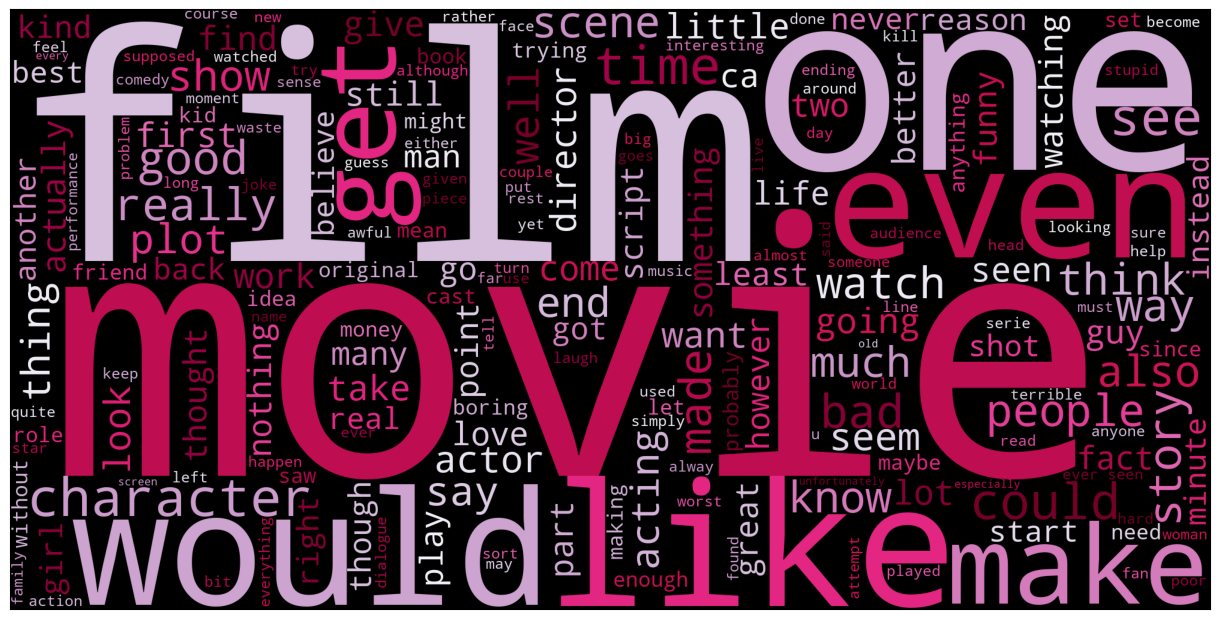

In [140]:
text_raw = ' '.join(all_words_class_0) 
wordcloud = WordCloud(width=2000, height=1000, stopwords=stop_words, colormap='PuRd').generate(text_raw)
plt.figure(figsize=(12, 6))
plt.xticks(())
plt.yticks(())
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.show()

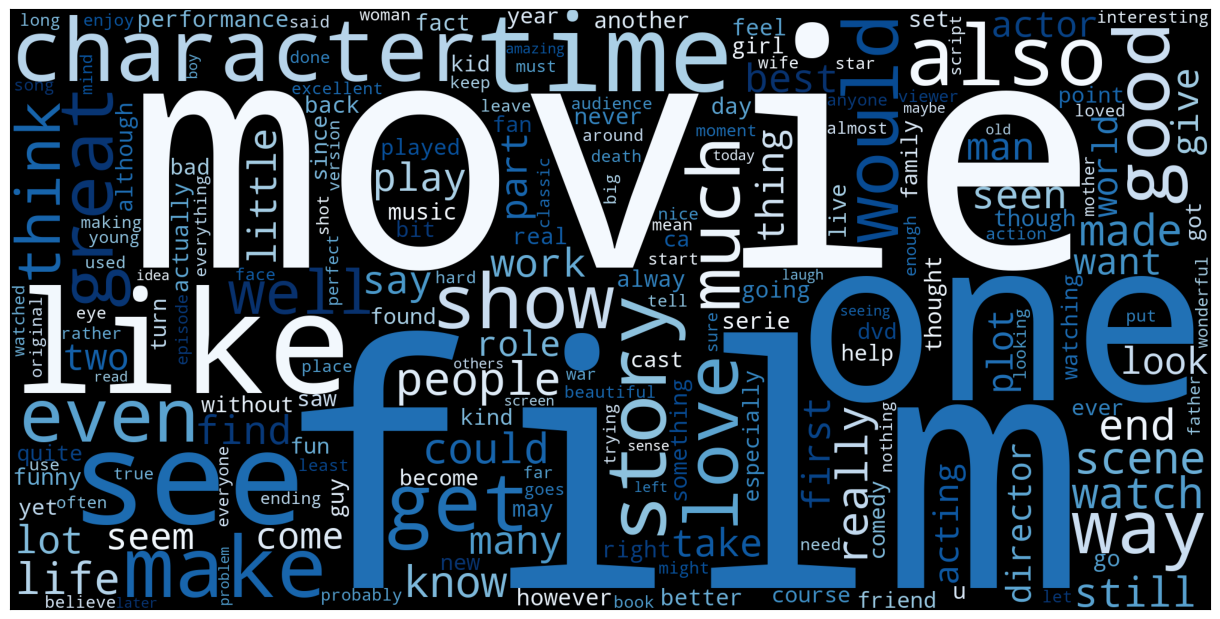

In [141]:
text_raw = ' '.join(all_words_class_1) 
wordcloud = WordCloud(width=2000, height=1000, stopwords=stop_words, colormap='Blues').generate(text_raw)
plt.figure(figsize=(12, 6))
plt.xticks(())
plt.yticks(())
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.show()

Лемматизируем (приведём к базовой форме) слова

In [142]:
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV

lemma_function = WordNetLemmatizer()
lemmatized_tokens = [[lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(doc)]
                     for doc in tqdm(corrected_tokens, file=sys.stdout, colour='GREEN')]

data['lemmatized_tokens'] = lemmatized_tokens
data.head()

100%|██████████| 39723/39723 [05:14<00:00, 126.42it/s]


text  label   len  \
0  I grew up (b. 1965) watching and loving the Th...      0   874   
1  When I put this movie in my DVD player, and sa...      0  1811   
2  Why do people who do not know what a particula...      0   983   
3  Even though I have great interest in Biblical ...      0   351   
4  Im a die hard Dads Army fan and nothing will e...      1   983   

                                              tokens  \
0  [i, grew, up, (, b, ., 1965, ), watching, and,...   
1  [when, i, put, this, movie, in, my, dvd, playe...   
2  [why, do, people, who, do, not, know, what, a,...   
3  [even, though, i, have, great, interest, in, b...   
4  [im, a, die, hard, dads, army, fan, and, nothi...   

                                    corrected_tokens  word_counts  \
0  [i, grew, up, b, 1965, watching, and, loving, ...          151   
1  [when, i, put, this, movie, in, my, dvd, playe...          332   
2  [why, do, people, who, do, not, know, what, a,...          191   
3  [even, though, i, have, great, interest, in, b...           69   
4  [im, a, die, hard, dads, army, fan, and, nothi...          175   

                                   lemmatized_tokens  
0  [i, grow, up, b, 1965, watching, and, love, th...  
1  [when, i, put, this, movie, in, my, dvd, playe...  
2  [why, do, people, who, do, not, know, what, a,...  
3  [even, though, i, have, great, interest, in, b...  
4  [im, a, die, hard, dad, army, fan, and, nothin...

Удалим стоп-слова (самые популярные слова, не несущие смысловой нагрузки: артикли, междометия, союзы и т.д.) из изначальных токенов

In [143]:
tokens_without_stop_words = [[t for t in s if t not in stop_words]
          for s in tqdm(tokens, file=sys.stdout, colour='GREEN')]
data['tokens_without_stop_words'] = tokens_without_stop_words
data.head()

100%|██████████| 39723/39723 [00:01<00:00, 31676.97it/s]


text  label   len  \
0  I grew up (b. 1965) watching and loving the Th...      0   874   
1  When I put this movie in my DVD player, and sa...      0  1811   
2  Why do people who do not know what a particula...      0   983   
3  Even though I have great interest in Biblical ...      0   351   
4  Im a die hard Dads Army fan and nothing will e...      1   983   

                                              tokens  \
0  [i, grew, up, (, b, ., 1965, ), watching, and,...   
1  [when, i, put, this, movie, in, my, dvd, playe...   
2  [why, do, people, who, do, not, know, what, a,...   
3  [even, though, i, have, great, interest, in, b...   
4  [im, a, die, hard, dads, army, fan, and, nothi...   

                                    corrected_tokens  word_counts  \
0  [i, grew, up, b, 1965, watching, and, loving, ...          151   
1  [when, i, put, this, movie, in, my, dvd, playe...          332   
2  [why, do, people, who, do, not, know, what, a,...          191   
3  [even, though, i, have, great, interest, in, b...           69   
4  [im, a, die, hard, dads, army, fan, and, nothi...          175   

                                   lemmatized_tokens  \
0  [i, grow, up, b, 1965, watching, and, love, th...   
1  [when, i, put, this, movie, in, my, dvd, playe...   
2  [why, do, people, who, do, not, know, what, a,...   
3  [even, though, i, have, great, interest, in, b...   
4  [im, a, die, hard, dad, army, fan, and, nothin...   

                           tokens_without_stop_words  
0  [grew, (, b, ., 1965, ), watching, loving, thu...  
1  [put, movie, dvd, player, ,, sat, coke, chips,...  
2  [people, know, particular, time, past, like, f...  
3  [even, though, great, interest, biblical, movi...  
4  [im, die, hard, dads, army, fan, nothing, ever...

И из лемматизированных токенов

In [144]:
lemmatized_tokens_without_stop_words = [[t for t in s if t not in stop_words]
          for s in tqdm(lemmatized_tokens, file=sys.stdout, colour='GREEN')]
data['lemmatized_tokens_without_stop_words'] = lemmatized_tokens_without_stop_words
data.head()

100%|██████████| 39723/39723 [00:01<00:00, 28660.30it/s]


text  label   len  \
0  I grew up (b. 1965) watching and loving the Th...      0   874   
1  When I put this movie in my DVD player, and sa...      0  1811   
2  Why do people who do not know what a particula...      0   983   
3  Even though I have great interest in Biblical ...      0   351   
4  Im a die hard Dads Army fan and nothing will e...      1   983   

                                              tokens  \
0  [i, grew, up, (, b, ., 1965, ), watching, and,...   
1  [when, i, put, this, movie, in, my, dvd, playe...   
2  [why, do, people, who, do, not, know, what, a,...   
3  [even, though, i, have, great, interest, in, b...   
4  [im, a, die, hard, dads, army, fan, and, nothi...   

                                    corrected_tokens  word_counts  \
0  [i, grew, up, b, 1965, watching, and, loving, ...          151   
1  [when, i, put, this, movie, in, my, dvd, playe...          332   
2  [why, do, people, who, do, not, know, what, a,...          191   
3  [even, though, i, have, great, interest, in, b...           69   
4  [im, a, die, hard, dads, army, fan, and, nothi...          175   

                                   lemmatized_tokens  \
0  [i, grow, up, b, 1965, watching, and, love, th...   
1  [when, i, put, this, movie, in, my, dvd, playe...   
2  [why, do, people, who, do, not, know, what, a,...   
3  [even, though, i, have, great, interest, in, b...   
4  [im, a, die, hard, dad, army, fan, and, nothin...   

                           tokens_without_stop_words  \
0  [grew, (, b, ., 1965, ), watching, loving, thu...   
1  [put, movie, dvd, player, ,, sat, coke, chips,...   
2  [people, know, particular, time, past, like, f...   
3  [even, though, great, interest, biblical, movi...   
4  [im, die, hard, dads, army, fan, nothing, ever...   

                lemmatized_tokens_without_stop_words  
0  [grow, b, 1965, watching, love, thunderbird, m...  
1  [put, movie, dvd, player, sit, coke, chip, exp...  
2  [people, know, particular, time, past, like, f...  
3  [even, though, great, interest, biblical, movi...  
4  [im, die, hard, dad, army, fan, nothing, ever,...

# <div align="center">**Отбор лучших моделей классического машинного обучения**</div>

Так как классы сбалансированы, в качестве метрики для оценки моделей будем использовать простую точность: 
$$
\text{Точность} = \frac{\text{Количество правильных предсказаний}}{\text{Общее количество предсказаний}}
$$
Точность моделей будет оцениваться с помощью кросс-валидации на 5 фолдах.
Зададим целевую и зависимую переменную и разделим выборку на обучающую и тестовую

In [145]:
X = tokens
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(31778, 7945)

Зададим список предварительно отобранных наиболее перспективных моделей для обучения

In [146]:
models = [
    ComplementNB(),
    MultinomialNB(),
    LogisticRegression(n_jobs=-1),
    SGDClassifier(n_jobs=-1),
    RidgeClassifier(),
    LinearSVC(dual=False),
    ExtraTreesClassifier()
]

Обучим модели с выводом результатов. Для обучения будем использовать векторизацию TF-IDF, очень эффективно учитывающую важность слова для текста:

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$

где:
- TF(t, d) — частота термина t в документе d,
- IDF(t) — обратная документная частота термина t, которая вычисляется как:

$$
\text{IDF}(t) = \log \frac{N}{\text{df}(t)}
$$

N — общее количество документов в корпусе,
df(t) — количество документов из корпуса, содержащих термин t

In [147]:
results = pd.DataFrame(columns=['Model', 'Cross-Validation Accuracy', 'Training Time'])

for model in models:
    start_time = time.time()
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, token_pattern=None)),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    mean_accuracy = np.mean(scores)
    end_time = time.time()
    training_time = end_time - start_time
    result = pd.DataFrame({
        'Model': [model.__class__.__name__],
        'Cross-Validation Accuracy': [mean_accuracy],
        'Training Time': [training_time]
    })
    results = pd.concat([results, result], ignore_index=True)
    print(f"\033[1m{'Модель ' + model.__class__.__name__:^65}\033[0m")
    print(f'Точность на тестовой выборке: \033[1m{mean_accuracy:.4f}\033[0m, время векторизации и обучения: \033[1m{training_time:.2f}\033[0m секунд', end='\n\n')

C:\Users\malna\AppData\Local\Temp\ipykernel_13796\183409436.py:18: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



                       Модель ComplementNB                       
Точность на тестовой выборке: 0.8638, время векторизации и обучения: 17.10 секунд

                      Модель MultinomialNB                       
Точность на тестовой выборке: 0.8643, время векторизации и обучения: 14.37 секунд

                    Модель LogisticRegression                    
Точность на тестовой выборке: 0.8921, время векторизации и обучения: 24.95 секунд

                      Модель SGDClassifier                       
Точность на тестовой выборке: 0.8967, время векторизации и обучения: 14.77 секунд

                     Модель RidgeClassifier                      
Точность на тестовой выборке: 0.8990, время векторизации и обучения: 16.79 секунд

                        Модель LinearSVC                         
Точность на тестовой выборке: 0.8986, время векторизации и обучения: 19.81 секунд

                   Модель ExtraTreesClassifier                   
Точность на тестовой выборке: 0.8599, вр

In [148]:
results = results.sort_values(by='Cross-Validation Accuracy', ascending=False)
results

Model  Cross-Validation Accuracy  Training Time
4       RidgeClassifier                   0.899018      16.793989
5             LinearSVC                   0.898578      19.807395
3         SGDClassifier                   0.896689      14.773121
2    LogisticRegression                   0.892064      24.945998
1         MultinomialNB                   0.864277      14.370999
0          ComplementNB                   0.863774      17.101893
6  ExtraTreesClassifier                   0.859872     952.417164

In [149]:
sorted_accuracy_df = results.sort_values(by='Cross-Validation Accuracy', ascending=True)
sorted_time_df = results.sort_values(by='Training Time', ascending=False)

fig_accuracy = px.bar(sorted_accuracy_df, x='Cross-Validation Accuracy', y='Model', orientation='h', color='Cross-Validation Accuracy', title='Точность моделей', color_continuous_scale='Picnic')
fig_accuracy.update_layout(xaxis_title='Cross-Validation Accuracy', yaxis_title='Model')

fig_time = px.bar(sorted_time_df, x='Training Time', y='Model', orientation='h', color='Training Time', title='Время обучения моделей', color_continuous_scale='Picnic')
fig_time.update_layout(xaxis_title='Training Time (seconds)', yaxis_title='Model')

fig = make_subplots(rows=1, cols=2, subplot_titles=('Точность моделей', 'Время обучения моделей'), horizontal_spacing=0.15)

for trace in fig_accuracy['data']:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_time['data']:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(height=600, width=1200, title_text="Сравнение моделей", showlegend=False, coloraxis_colorscale='Picnic')
fig.show()

# <div align="center">**Оптимизация гиперпараметров для лучших моделей**</div>

Лучшие результаты показали модели RidgeClassifier и LinearSVC, будем работать с ними.

RidgeClassifier - это классификатор, основанный на методе гребневой регрессии (ridge regression), который включает L2-регуляризацию для предотвращения переобучения.
  - Модель минимизирует следующую целевую функцию:
    $$
    \min_{w} ||Xw - y||^2_2 + \alpha ||w||^2_2
    $$
    где X — матрица признаков, w — вектор весов, y — вектор ответов, а alpha — параметр регуляризации

LinearSVC - это классификатор на основе метода опорных векторов (Support Vector Classification) для линейной классификации.
  - Функция потерь, которую минимизирует LinearSVC, выглядит следующим образом:
    $$
    \min_{w} \frac{1}{2}w^T w + C \sum_{i=1}^{n} \max(0, 1 - y_i (w^T x_i + b))
    $$
    где w — вектор весов, xᵢ — векторы признаков, yᵢ — метки классов, b — смещение, а C — параметр регуляризации, контролирующий штраф за неправильную классификацию

Помимо моделей и гиперпараметров к ним будем отбирать лучший вариант предобработки текста, так как это тоже неочевидная задача, ведь при предобработке текст упрощается, а это не всегда помогает, особенно в такой задаче, как анализ тональности, где очень важны тонкие различия. Простой пример: слово "нравится" имеет позитивную коннотацию, а "нравилось" - уже скорее негативную. 

Также к векторизации tf-idf добавим вариант word2vec - векторизацию, основанную на нейронных сетях, учитывающую близость значений слов (семантическое расстояние)

In [31]:
class Word2VecVectorizer(TransformerMixin):
    def __init__(self, model_w2v):
        self.model_w2v = model_w2v
        self.vector_size = model_w2v.vector_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.model_w2v.wv[word] for word in words if word in self.model_w2v.wv]
                    or [np.zeros(self.vector_size)], axis=0)
            for words in X
        ])

Создадим функцию для сохранения шагов оптимизации в файл csv

In [32]:
def save_trial_to_csv(study, trial):
    trial_df = pd.DataFrame({
        'trial_number': [trial.number],
        'params': [str(trial.params)],
        'value': [trial.value]
    })
    
    with open('optuna_trials.csv', mode='a', newline='') as f:
        trial_df.to_csv(f, header=f.tell()==0, index=False)

Создадим и запустим оптимизацию

In [ ]:
def create_pipeline(trial):
    best_dataset_column = trial.suggest_categorical('dataset_column', ['tokens', 'corrected_tokens', 'lemmatized_tokens',
                                                                        'tokens_without_stop_words', 'lemmatized_tokens_without_stop_words'])
    global X, y, X_train, X_test, y_train, y_test
    X =  data[best_dataset_column]
    y = label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    vectorizer_name = trial.suggest_categorical('vectorizer', ['TfidfVectorizer', 'Word2VecVectorizer'])
    if vectorizer_name == 'TfidfVectorizer':
        tfidf_params = {
                'ngram_range': (1, trial.suggest_int('tfidf_max_ngram', 1, 3)),
                'max_df': trial.suggest_float('tfidf_max_df', 0.7, 1.0),
                'tokenizer': lambda x: x,
                'preprocessor': lambda x: x,
                'token_pattern': None
            }
        tfidf_params['min_df'] = trial.suggest_int('tfidf_min_df', 1, int(tfidf_params['max_df'] * 1000))
        vectorizer = TfidfVectorizer(**tfidf_params)

    else:
        w2v_params = {
            'vector_size': trial.suggest_int('w2v_vector_size', 50, 300),
            'window': trial.suggest_int('w2v_window', 1, 10),
            'min_count': trial.suggest_int('w2v_min_count', 1, 10),
            'epochs': trial.suggest_int('w2v_epochs', 5, 30),
            'workers': 8
        }
        model_w2v = Word2Vec(X_train, **w2v_params)
        vectorizer = Word2VecVectorizer(model_w2v)

    classifier_name = trial.suggest_categorical('classifier', ['RidgeClassifier', 'LinearSVC'])
    if classifier_name == 'RidgeClassifier':
        classifier_params = {
            'alpha': trial.suggest_float('ridge_alpha', 1e-10, 10),
            'tol': trial.suggest_float('ridge_tol', 1e-5, 1e-1),
            'solver': trial.suggest_categorical('ridge_solver', ['auto', 'lsqr', 'sparse_cg', 'sag', 'saga']),
        }
        if classifier_params['solver'] == 'saga':
            classifier_params['fit_intercept'] = False      
        if classifier_params['solver'] == 'lbfgs':
            classifier_params['positive'] = True
        classifier = RidgeClassifier(**classifier_params)
        
    else:
        classifier_params = {
                'penalty': trial.suggest_categorical('svc_penalty', ['l1', 'l2']),
                'C': trial.suggest_float('svc_C', 1e-5, 100),
                'tol': trial.suggest_float('svc_tol', 1e-5, 1e-1),
                'max_iter': trial.suggest_int('svc_max_iter', 1000, 20000)
            }
        if classifier_params['penalty'] == 'l1':
            classifier_params['loss'] = 'squared_hinge'
            classifier_params['dual'] = False 
        else:
            classifier_params['loss'] = trial.suggest_categorical('svc_loss', ['hinge', 'squared_hinge'])
        classifier = LinearSVC(**classifier_params)
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])
    return pipeline


def objective(trial):
    try:
        pipeline = create_pipeline(trial)
        score = cross_val_score(pipeline, X, y, n_jobs=-1, cv=5).mean()
        return score
    except Exception as e:
        print(f"An error occurred: {e}")
        return float('-inf')

study = optuna.create_study(direction='maximize', study_name='Оптимизация сентимент-анализа рецензий к фильмам')
study.optimize(objective, n_trials=500, callbacks=[save_trial_to_csv])

При оптимизации моделей с помощью Optuna были рассмотрены следующие гиперпараметры:

1. TF-IDF Vectorizer
   - ngram_range: Диапазон n-грамм для векторизации (от 1 до 3). Этот параметр определяет, будет ли модель учитывать только отдельные слова или также последовательности из нескольких слов.
   - max_df: Максимальная доля документов, в которых может встречаться термин (0.7 до 1.0). Этот параметр помогает исключить слишком частые термины, которые могут быть неинформативными.
   - min_df: Минимальная доля документов, в которых должен встречаться термин для его учета (от 1 до значений, зависящих от размера датасета). Этот параметр помогает исключить редкие термины.
2. Word2Vec
   - vector_size: Размер векторного представления слов (от 50 до 300). Этот параметр определяет размерность векторов, в которые будут преобразованы слова.
   - window: Максимальная дистанция между текущим и предсказанным словом в предложении (от 1 до 10). Этот параметр определяет контекст, учитываемый для каждого слова.
   - min_count: Минимальное количество появлений слова для его учета в модели (от 1 до 10). Этот параметр помогает исключить редкие слова.
   - epochs: Количество эпох обучения (от 5 до 30). Этот параметр определяет, сколько раз модель будет проходить через весь тренировочный датасет.
   - workers: Количество потоков для параллельного обучения (8).

3. Ridge Classifier
   - alpha: Коэффициент регуляризации (от 1e-10 до 10). Этот параметр помогает предотвратить переобучение, контролируя сложность модели.
   - tol: Допустимая ошибка для сходимости (от 1e-5 до 1e-1). Этот параметр определяет точность, с которой должна быть достигнута оптимизация.
   - solver: Метод решения (выбор из 'auto', 'lsqr', 'sparse_cg', 'cholesky', 'sag', 'saga'). Этот параметр определяет алгоритм, используемый для оптимизации.

4. LinearSVC
   - penalty: Тип регуляризации ('l1' или 'l2'). Этот параметр определяет, будет ли модель использовать L1 или L2 регуляризацию.
   - C: Коэффициент регуляризации (от 1e-5 до 100). Этот параметр контролирует сложность модели и помогает предотвратить переобучение.
   - tol: Допустимая ошибка для сходимости (от 1e-5 до 1e-1). Этот параметр определяет точность, с которой должна быть достигнута оптимизация.
   - max_iter: Максимальное количество итераций для оптимизации (от 1000 до 20000). Этот параметр определяет, сколько итераций должно быть выполнено для достижения сходимости.
   - loss: Функция потерь ('hinge' или 'squared_hinge'). Этот параметр определяет, какую функцию потерь будет минимизировать модель.

Эти гиперпараметры были выбраны для оптимизации с целью максимизации точности моделей на основе кросс-валидации.

Изобразим историю нашей оптимизации, красная линия - это лучшая попытка

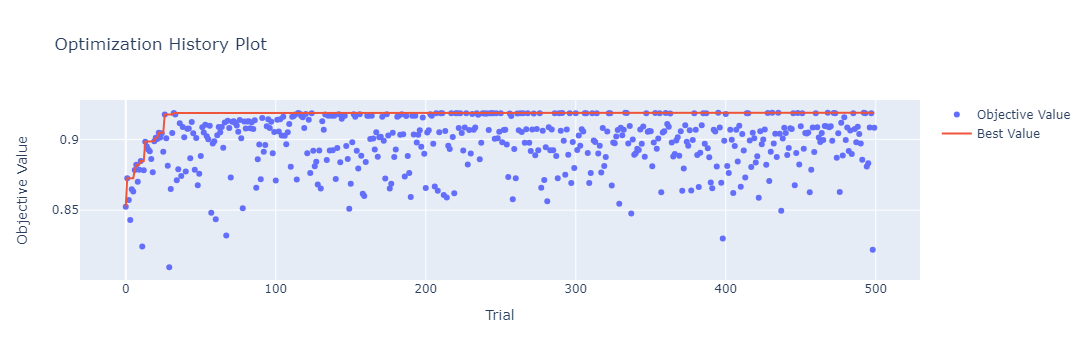

In [36]:
plot_optimization_history(study)

Посмотрим, как был достигнут лучший результат

In [39]:
study.best_params

{'dataset_column': 'tokens',
 'vectorizer': 'TfidfVectorizer',
 'tfidf_max_ngram': 3,
 'tfidf_max_df': 0.7514138448538783,
 'tfidf_min_df': 1,
 'classifier': 'LinearSVC',
 'svc_penalty': 'l2',
 'svc_C': 6.6021832382344945,
 'svc_tol': 0.08599162071672602,
 'svc_max_iter': 17602,
 'svc_loss': 'hinge'}

Считаем и выведем сохранённые шаги оптимизации в датафрейм

In [3]:
optuna_study = pd.read_csv(r'C:\Users\Danya\Documents\Coursework\optuna_trials.csv').sort_values(by='value', ascending=False)
optuna_study.head()

trial_number                                             params     value
431           431  {'dataset_column': 'tokens', 'vectorizer': 'Tf...  0.918788
435           435  {'dataset_column': 'tokens', 'vectorizer': 'Tf...  0.918737
492           492  {'dataset_column': 'tokens', 'vectorizer': 'Tf...  0.918712
395           395  {'dataset_column': 'tokens', 'vectorizer': 'Tf...  0.918712
333           333  {'dataset_column': 'tokens', 'vectorizer': 'Tf...  0.918712

Обучим оптимизированную модель и выведем метрики

In [150]:
X = tokens
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3), max_df= 0.7514138448538783, min_df=1, preprocessor=lambda x: x, tokenizer=lambda x: x, token_pattern=None)),
    ('classifier', LinearSVC(penalty='l2', C=6.6021832382344945, tol=0.08599162071672602, max_iter=17602, loss='hinge', dual=True))
])
pipeline.fit(X_train, y_train)
end_time = time.time()
print(f"\033[1m{'Модель LinearSVC':^65}\033[0m")
print(f'Точность на тестовой выборке: \033[1m{pipeline.score(X_test, y_test):.4f}\033[0m, время векторизации и обучения: \033[1m{end_time - start_time:.2f}\033[0m секунд', end='\n\n')
print(classification_report(y_test, pipeline.predict(X_test)))

                        Модель LinearSVC                         
Точность на тестовой выборке: 0.9181, время векторизации и обучения: 57.30 секунд

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3991
           1       0.91      0.92      0.92      3954

    accuracy                           0.92      7945
   macro avg       0.92      0.92      0.92      7945
weighted avg       0.92      0.92      0.92      7945



### Краткое описание используемых библиотек:

С помощью подбора векторизации, предобработки, модели и её гиперпараметров, удалось повысить точность классификации более чем на 1,5%

Изобразим матрицу ошибок модели

In [151]:
cm = confusion_matrix(y_test, pipeline.predict(X_test))
fig = px.imshow(cm, text_auto=True, width=750, height=750, color_continuous_scale='Picnic')
fig.update_layout(title=f'Матрица ошибок LinearSVC', xaxis_title='Предсказание', yaxis_title='Истина', title_x=0.5)
fig.show()

Модель ошибается на обоих классах примерно одинаково

Чтобы превзойти полученные с помощью классического машинного обучения результаты, обратимся в нейросетевым решениям, а именно к предобученным моделям-трансформерам с сайта [huggingface.co](huggingface.co), которые будем дообучать под нашу задачу

Трансформеры — это архитектура глубоких нейронных сетей. Архитектура трансформера состоит из двух основных частей: кодировщика и декодировщика. Кодировщик преобразует входную последовательность в набор векторов с позиционной информацией, а декодировщик генерирует выходную последовательность, используя векторы кодировщика и часть уже сгенерированного выхода. Основной инновацией трансформеров является механизм внимания, который позволяет модели фокусироваться на различных частях входных данных при генерации каждого элемента выходной последовательности. Это улучшает способность модели понимать контекст и улавливать зависимости в данных, что делает трансформеры особенно эффективными для работы с языком.

# <div align="center">**Модель "Longformer"**</div>

Так как тексты рецензий довольно длинные, я решил использовать модель Longformer. Она разработана для эффективной обработки длинных текстовых последовательностей, что является вызовом для традиционных трансформерных моделей из-за их квадратичной сложности по отношению к длине последовательности.

Вновь загрузим датасет и разделим его уже на три выборки: обучающую, валидационную и тестовую. Валидационная выборка необходима, чтобы с помощью неё оценивать качество модели при обучении

In [ ]:
dataset = load_dataset('csv', data_files=r'C:/Users/Danya/Documents/Coursework/movie.csv')
train_temp_dataset = dataset['train'].train_test_split(train_size=0.8)
train_dataset = train_temp_dataset['train']

val_test_dataset = train_temp_dataset['test'].train_test_split(train_size=0.5)
eval_dataset = val_test_dataset['train']
test_dataset = val_test_dataset['test']

train_dataset, eval_dataset, test_dataset

(Dataset({
     features: ['text', 'label'],
     num_rows: 32000
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 4000
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 4000
 }))

Токенизируем тексты 

In [ ]:
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096',
                                                           gradient_checkpointing=True,
                                                           attention_window = 512)
tokenizer = LongformerTokenizerFast.from_pretrained('allenai/longformer-base-4096', max_length = 1024)

def tokenization(batched_text):
    return tokenizer(batched_text['text'], padding = 'max_length', truncation=True, max_length = 1024)

tokenized_train_dataset = train_dataset.map(tokenization, batched=True, batch_size=len(train_dataset))
tokenized_eval_dataset = eval_dataset.map(tokenization, batched=True, batch_size=len(eval_dataset))
tokenized_test_dataset = test_dataset.map(tokenization, batched=True, batch_size=len(test_dataset))

tokenized_train_dataset, tokenized_eval_dataset, tokenized_test_dataset

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 4000/4000 [00:02<00:00, 1562.40 examples/s]


(Dataset({
     features: ['text', 'label', 'input_ids', 'attention_mask'],
     num_rows: 32000
 }),
 Dataset({
     features: ['text', 'label', 'input_ids', 'attention_mask'],
     num_rows: 4000
 }),
 Dataset({
     features: ['text', 'label', 'input_ids', 'attention_mask'],
     num_rows: 4000
 }))

Создадим фунцию оценки точности классификации, зададим гиперпараметры обучения и обучим модель

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc}

training_args = TrainingArguments(
    output_dir='Longformer-models',
    num_train_epoch=5,
    per_device_train_batch_size=8,
    gradient_accumulation_steps=8,    
    per_device_eval_batch_size=8,
    evaluation_strategy='steps',
    save_strategy='steps',
    logging_steps=100,
    eval_steps=100,
    save_steps=100,
    metric_for_best_model='accuracy',
    disable_tqdm=False, 
    load_best_model_at_end=True,
    warmup_steps=200,
    weight_decay=0.01,
    fp16=True,
    dataloader_num_workers=4,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
    )

trainer.train()

Оценим работу модели на обучающей выборке

In [ ]:
trainer.evaluate(tokenized_train_dataset)

100%|██████████| 4000/4000 [41:20<00:00,  1.61it/s]


{'eval_loss': 0.008600141853094101,
 'eval_accuracy': 0.9985,
 'eval_runtime': 2511.6354,
 'eval_samples_per_second': 12.741,
 'eval_steps_per_second': 1.593,
 'epoch': 5.0}

На валидационной

In [ ]:
trainer.evaluate(tokenized_eval_dataset)

100%|██████████| 500/500 [05:11<00:00,  1.60it/s]


{'eval_loss': 0.2164158821105957,
 'eval_accuracy': 0.9615,
 'eval_runtime': 342.7304,
 'eval_samples_per_second': 11.671,
 'eval_steps_per_second': 1.459,
 'epoch': 5.0}

И на тестовой

In [ ]:
trainer.evaluate(tokenized_test_dataset)

100%|██████████| 500/500 [05:11<00:00,  1.60it/s]


{'eval_loss': 0.24425974488258362,
 'eval_accuracy': 0.954,
 'eval_runtime': 342.8888,
 'eval_samples_per_second': 11.666,
 'eval_steps_per_second': 1.458,
 'epoch': 5.0}

По сравнению с классическими алгоритмами, точность увеличилась более чем на 3,5 процента 

# <div align="center">**Модель "RoBERTa"**</div>

Попробуем другую модель. RoBERTa — это модель для обработки языка. Она эффективнее предшественника BERT благодаря оптимизациям в процессе обучения и способности точнее интерпретировать контекст слов.

Загрузим и разделим датасет

In [35]:
dataset = load_dataset('csv', data_files=r'C:/Users/Danya/Documents/Coursework/movie.csv')
train_temp_dataset = dataset['train'].train_test_split(train_size=0.8)
train_dataset = train_temp_dataset['train']

val_test_dataset = train_temp_dataset['test'].train_test_split(train_size=0.5)
eval_dataset = val_test_dataset['train']
test_dataset = val_test_dataset['test']
train_dataset, eval_dataset, test_dataset

(Dataset({
     features: ['text', 'label'],
     num_rows: 32000
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 4000
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 4000
 }))

Токенизируем тексты 

In [36]:
model = RobertaForSequenceClassification.from_pretrained('roberta-large')
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-large', max_length=512)

def tokenization(batched_text):
    return tokenizer(batched_text['text'], padding = True, truncation=True)

tokenized_train_dataset = train_dataset.map(tokenization, batched=True, batch_size=len(train_dataset))
tokenized_eval_dataset = eval_dataset.map(tokenization, batched=True, batch_size=len(eval_dataset))
tokenized_test_dataset = test_dataset.map(tokenization, batched=True, batch_size=len(test_dataset))

tokenized_train_dataset, tokenized_eval_dataset, tokenized_test_dataset

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/32000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

(Dataset({
     features: ['text', 'label', 'input_ids', 'attention_mask'],
     num_rows: 32000
 }),
 Dataset({
     features: ['text', 'label', 'input_ids', 'attention_mask'],
     num_rows: 4000
 }),
 Dataset({
     features: ['text', 'label', 'input_ids', 'attention_mask'],
     num_rows: 4000
 }))

Создадим фунцию оценки точности классификации, зададим гиперпараметры обучения и обучим модель

In [37]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc}

training_args = TrainingArguments(
    output_dir='roberta-large-models',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    gradient_accumulation_steps=8,    
    per_device_eval_batch_size=8,
    evaluation_strategy='steps',
    save_strategy='steps',
    disable_tqdm=False, 
    load_best_model_at_end=True,
    warmup_steps=500,
    weight_decay=0.01,
    eval_steps=100,
    save_steps=100,
    logging_steps=100,
    metric_for_best_model='accuracy',
    dataloader_num_workers=4,
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_eval_dataset
)

In [ ]:
trainer.train()

Оценим работу модели на обучающей выборке

In [ ]:
trainer.evaluate(tokenized_train_dataset)

100%|██████████| 4000/4000 [39:57<00:00,  1.67it/s]


{'eval_loss': 0.013983462937176228,
 'eval_accuracy': 0.99775,
 'eval_runtime': 2402.0753,
 'eval_samples_per_second': 13.322,
 'eval_steps_per_second': 1.665,
 'epoch': 5.0}

На валидационной

In [ ]:
trainer.evaluate(tokenized_eval_dataset)

100%|██████████| 500/500 [04:40<00:00,  1.78it/s]


{'eval_loss': 0.21896421909332275,
 'eval_accuracy': 0.95725,
 'eval_runtime': 284.6309,
 'eval_samples_per_second': 14.053,
 'eval_steps_per_second': 1.757,
 'epoch': 5.0}

И на тестовой

In [ ]:
trainer.evaluate(tokenized_test_dataset)

100%|██████████| 500/500 [04:40<00:00,  1.78it/s]


{'eval_loss': 0.1988065391778946,
 'eval_accuracy': 0.95975,
 'eval_runtime': 284.8621,
 'eval_samples_per_second': 14.042,
 'eval_steps_per_second': 1.755,
 'epoch': 5.0}

Точность выше на полпроцента, чем у Longformer

# <div align="center">**Заключение**</div>

В ходе работы с помощью классических алгоритмов машинного обучения получилось достигнуть точности классификации 0.9181. Эти модели показывают довольно высокие результаты, будучи нетребовательными к вычислительным мощностям. С помощью моделей глубокого обучения удалось достигнуть более высокой точности - 0.95975, они гораздо больше подходят для реальных бизнес-задач, но закономерно значительно тяжелее и требовательнее к ресурсам.

### Краткое описание используемых библиотек:

- **itertools**: Предоставляет функции для создания итераторов для эффективного циклического перебора данных.
- **pkg_resources**: Используется для доступа к ресурсам внутри пакетов и для управления версиями пакетов.
- **sys**: Предоставляет доступ к некоторым переменным и функциям, которые взаимодействуют с интерпретатором Python.
- **time**: Позволяет работать со временем, включая функции для ожидания и измерения производительности.

- **numpy**: Основная библиотека для научных вычислений в Python, предоставляет многомерные массивы и инструменты для работы с ними.
- **pandas**: Библиотека для анализа и манипуляции данными, предоставляет структуры данных DataFrame и Series.

- **matplotlib**: Библиотека для создания статических, анимированных и интерактивных визуализаций в Python.
- **plotly**: Библиотека для создания интерактивных графиков и дашбордов.
- **wordcloud**: Используется для создания облака слов из текста для визуализации частоты слов.

- **sklearn**: Мощная библиотека для машинного обучения, включает в себя множество алгоритмов классификации, регрессии и кластеризации.
- **optuna**: Фреймворк для оптимизации гиперпараметров машинного обучения.

- **gensim**: Библиотека для тематического моделирования и обработки естественного языка, известна своими возможностями по работе с Word2Vec.
- **nltk**: Набор инструментов для работы с естественным языком, включает в себя обработку текста и анализ.
- **symspellpy**: Библиотека для быстрой проверки орфографии и исправления опечаток.
- **tqdm**: Инструмент для создания индикаторов выполнения (прогресс-баров) в циклах.

- **transformers**: Библиотека от Hugging Face, предоставляющая предобученные модели для обработки естественного языка.
- **datasets**: Библиотека от Hugging Face для загрузки и работы с наборами данных для машинного обучения.